In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()


In [18]:
data = pd.read_csv("Amazon.txt", delimiter='\t')


In [19]:
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [20]:
ratings = data["rating"].value_counts()
number = ratings.index
quantity = ratings.values

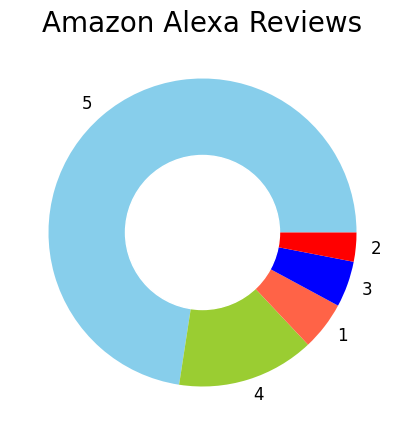

In [21]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=number, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()

In [22]:
data["verified_reviews"] = data["verified_reviews"].astype(str)

sentiments = SentimentIntensityAnalyzer()

# Apply sentiment analysis
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]


In [23]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z=sum(data["Neutral"])


In [24]:
def sentiment_score(a,b,c):
    if(a>b) and (a>c):
        print("Positive")
    elif(b>a) and (b>c):
        print ("Negative")
    else:
        print("Neutral")


In [25]:
sentiment_score(x,y,z)

Neutral
